In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('winequality.csv')

X = df.drop('quality', axis=1)
y = df['quality']

In [3]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [4]:
df.duplicated().sum()

937

In [5]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [6]:
df['quality'].value_counts()

6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: quality, dtype: int64

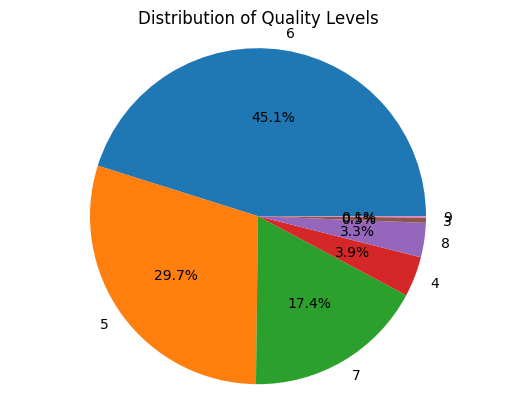

In [7]:
plt.pie(df['quality'].value_counts(), labels=df['quality'].value_counts().index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Quality Levels')
plt.show()

In [8]:
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

In [9]:
df = pd.DataFrame(X, columns=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"
])
df['quality'] = y
X = df.drop("quality", axis=1)

In [10]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

print('Train dataset shape:', X_train.shape)
print('Validation dataset shape:', X_val.shape)
print('Test dataset shape:', X_test.shape)

Train dataset shape: (3330, 11)
Validation dataset shape: (588, 11)
Test dataset shape: (980, 11)


# Logistic Regression

No. of features: 
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 

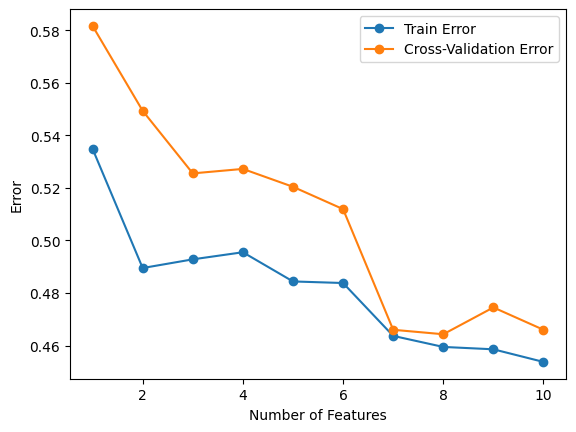

In [11]:
train_error, test_error, val_error = [], [], []
numOfFeatures = range(1, 11)

print("No. of features: ")
for n in numOfFeatures:
    print(n, end=', ')
    selector = SelectKBest(mutual_info_classif, k=n)
    selector.fit(X_train, y_train)
    selected_features = X_train.columns[selector.get_support()]
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    X_val_selected = X_val[selected_features]

    logisticRegressor = LogisticRegression(max_iter=500000)

    logisticRegressor.fit(X_train_selected, y_train)

    train_error.append(1 - logisticRegressor.score(X_train_selected, y_train))
    test_error.append(1 - logisticRegressor.score(X_test_selected, y_test))
    val_error.append(1 - logisticRegressor.score(X_val_selected, y_val))

plt.plot(numOfFeatures, train_error, 'o-', label="Train Error")
plt.plot(numOfFeatures, val_error, 'o-', label="Cross-Validation Error")
plt.xlabel("Number of Features")
plt.ylabel("Error")
plt.legend()
plt.show()

Regularization Parameter: 
0.001, 0.0026826957952797246, 0.0071968567300115215, 0.019306977288832496, 0.0517947467923121, 0.13894954943731375, 0.3727593720314938, 1.0, 2.6826957952797246, 7.196856730011514, 19.306977288832496, 51.794746792312125, 138.9495494373136, 372.7593720314938, 1000.0, 

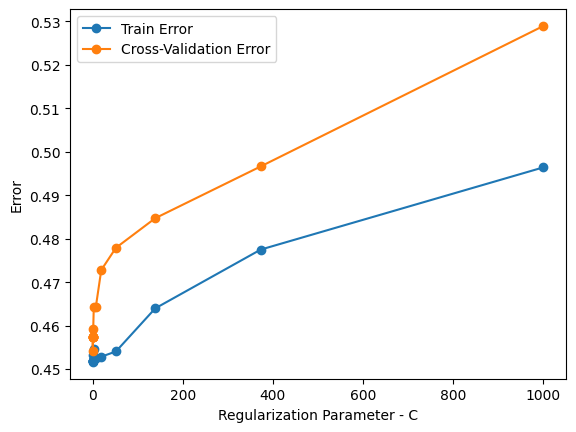

In [12]:
train_error, test_error, val_error = [], [], []
# regParamValues = [0.0001, 0.001, 0.01, 0.1, 1]
regParamValues = np.logspace(-3, 3, num=15)

print("Regularization Parameter: ")
for c in regParamValues:
    print(c, end=', ')
    logisticRegressor = LogisticRegression(max_iter=500000, C=1/c)
    logisticRegressor.fit(X_train, y_train)

    train_error.append(1 - logisticRegressor.score(X_train, y_train))
    test_error.append(1 - logisticRegressor.score(X_test, y_test))
    val_error.append(1 - logisticRegressor.score(X_val, y_val))

plt.plot(regParamValues, train_error, 'o-', label="Train Error")
plt.plot(regParamValues, val_error, 'o-', label="Cross-Validation Error")
plt.xlabel("Regularization Parameter - C")
plt.ylabel("Error")
plt.legend()
plt.show()

C:\Users\Nasir Khurshid\AppData\Local\Temp\ipykernel_17584\2278484126.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train_subset = y_train[:num_train]
C:\Users\Nasir Khurshid\AppData\Local\Temp\ipykernel_17584\2278484126.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train_subset = y_train[:num_train]
C:\Users\Nasir Khurshid\AppData\Local\Temp\ipykernel_17584\2278484126.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated.

Data Size: 
333, 832, 1332, 1831, 2331, 2830, 3330, 

C:\Users\Nasir Khurshid\AppData\Local\Temp\ipykernel_17584\2278484126.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train_subset = y_train[:num_train]
C:\Users\Nasir Khurshid\AppData\Local\Temp\ipykernel_17584\2278484126.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train_subset = y_train[:num_train]


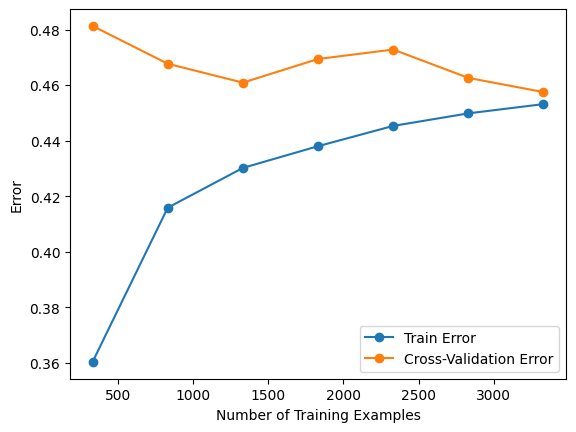

In [13]:
train_error, test_error, val_error = [], [], []
train_sizes = np.linspace(0.1, 1.0, num=7)

print("Data Size: ")
for train_size in train_sizes:
    num_train = int(train_size * X_train.shape[0])
    print(num_train, end=', ')

    X_train_subset = X_train[:num_train]
    y_train_subset = y_train[:num_train]

    logisticRegressor = LogisticRegression(max_iter=500000)

    logisticRegressor.fit(X_train_subset, y_train_subset)

    train_error.append(1 - logisticRegressor.score(X_train_subset, y_train_subset))
    test_error.append(1 - logisticRegressor.score(X_test, y_test))
    val_error.append(1 - logisticRegressor.score(X_val, y_val))

plt.plot(train_sizes * X_train.shape[0], train_error, 'o-', label="Train Error")
plt.plot(train_sizes * X_train.shape[0], val_error, 'o-', label="Cross-Validation Error")
plt.xlabel("Number of Training Examples")
plt.ylabel("Error")
plt.legend()
plt.show()

# Neural Network

No. of features: 
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 

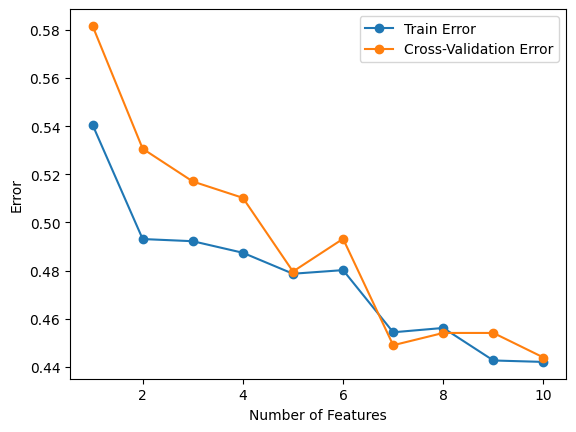

In [14]:
train_error, test_error, val_error = [], [], []
numOfFeatures = range(1, 11)

print("No. of features: ")
for n in numOfFeatures:
    print(n, end=', ')
    selector = SelectKBest(mutual_info_classif, k=n)
    selector.fit(X_train, y_train)
    selected_features = X_train.columns[selector.get_support()]
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    X_val_selected = X_val[selected_features]

    model = MLPClassifier(hidden_layer_sizes=(5,), max_iter=500000)
    model.fit(X_train_selected, y_train)
    
    train_error.append(1 - model.score(X_train_selected, y_train))
    test_error.append(1 - model.score(X_test_selected, y_test))
    val_error.append(1 - model.score(X_val_selected, y_val))

plt.plot(numOfFeatures, train_error, 'o-', label="Train Error")
plt.plot(numOfFeatures, val_error, 'o-', label="Cross-Validation Error")
plt.xlabel("Number of Features")
plt.ylabel("Error")
plt.legend()
plt.show()

Regularization Parameter: 
0.001, 0.0026826957952797246, 0.0071968567300115215, 0.019306977288832496, 0.0517947467923121, 0.13894954943731375, 0.3727593720314938, 1.0, 2.6826957952797246, 7.196856730011514, 19.306977288832496, 51.794746792312125, 138.9495494373136, 372.7593720314938, 1000.0, 

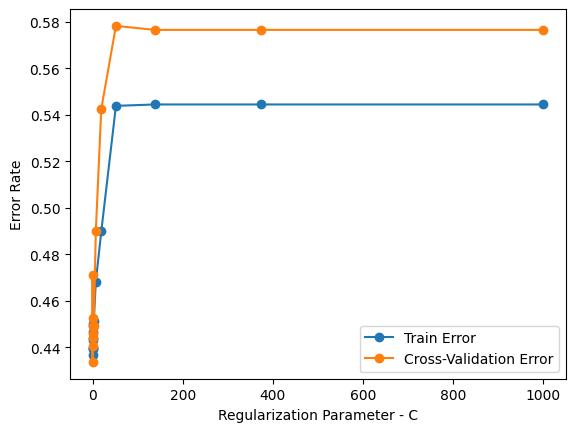

In [15]:
train_error, test_error, val_error = [], [], []
# regParamValues = [0.0001, 0.001, 0.01, 0.1, 1]
regParamValues = np.logspace(-3, 3, num=15)

print("Regularization Parameter: ")
for c in regParamValues:
    print(c, end=', ')
    model = MLPClassifier(hidden_layer_sizes=(5,), max_iter=500000, alpha=c)
    model.fit(X_train, y_train)
    
    train_error.append(1 - model.score(X_train, y_train))
    test_error.append(1 - model.score(X_test, y_test))
    val_error.append(1 - model.score(X_val, y_val))

plt.plot(regParamValues, train_error, 'o-', label="Train Error")
plt.plot(regParamValues, val_error, 'o-', label="Cross-Validation Error")
plt.xlabel("Regularization Parameter - C")
plt.ylabel("Error Rate")
plt.legend()
plt.show()

Data Size: 
333, 

C:\Users\Nasir Khurshid\AppData\Local\Temp\ipykernel_17584\4256976048.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train_subset = y_train[:num_train]


832, 

C:\Users\Nasir Khurshid\AppData\Local\Temp\ipykernel_17584\4256976048.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train_subset = y_train[:num_train]


1332, 

C:\Users\Nasir Khurshid\AppData\Local\Temp\ipykernel_17584\4256976048.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train_subset = y_train[:num_train]


1831, 

C:\Users\Nasir Khurshid\AppData\Local\Temp\ipykernel_17584\4256976048.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train_subset = y_train[:num_train]


2331, 

C:\Users\Nasir Khurshid\AppData\Local\Temp\ipykernel_17584\4256976048.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train_subset = y_train[:num_train]


2830, 

C:\Users\Nasir Khurshid\AppData\Local\Temp\ipykernel_17584\4256976048.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train_subset = y_train[:num_train]


3330, 

C:\Users\Nasir Khurshid\AppData\Local\Temp\ipykernel_17584\4256976048.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train_subset = y_train[:num_train]


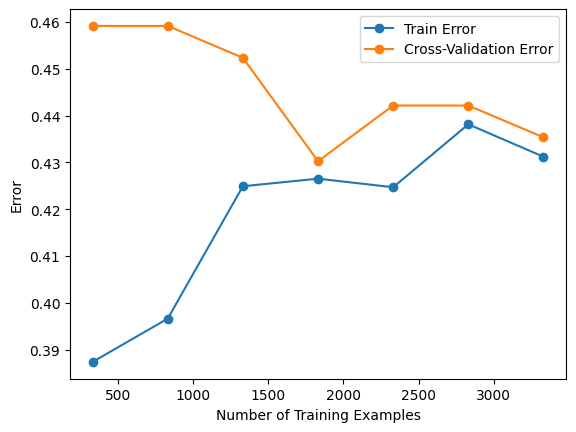

In [17]:
train_error, test_error, val_error = [], [], []
train_sizes = np.linspace(0.1, 1.0, num=7)

print("Data Size: ")
for train_size in train_sizes:
    num_train = int(train_size * X_train.shape[0])
    print(num_train, end=', ')

    X_train_subset = X_train[:num_train]
    y_train_subset = y_train[:num_train]

    model = MLPClassifier(hidden_layer_sizes=(7,), max_iter=10000)
    model.fit(X_train, y_train)    

    train_error.append(1 - model.score(X_train_subset, y_train_subset))
    test_error.append(1 - model.score(X_test, y_test))
    val_error.append(1 - model.score(X_val, y_val))

plt.plot(train_sizes * X_train.shape[0], train_error, 'o-', label="Train Error")
plt.plot(train_sizes * X_train.shape[0], val_error, 'o-', label="Cross-Validation Error")
plt.xlabel("Number of Training Examples")
plt.ylabel("Error")
plt.legend()
plt.show()